# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

In [1]:
import numpy as np

m = 2;
s = 0.125;

array = np.random.normal(m, s, 5000);

h = np.histogram(array, 10);

print(h)

(array([   9,   52,  241,  661, 1177, 1305,  980,  419,  126,   30],
      dtype=int64), array([1.54459161, 1.63088172, 1.71717183, 1.80346194, 1.88975205,
       1.97604216, 2.06233227, 2.14862238, 2.23491249, 2.3212026 ,
       2.40749271]))


The second array that is returned from the histogram function is one unit larger than the first one.

In [2]:
import matplotlib.pyplot as plt

plt.hist(array, bins=10, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title('Gaussian distribution histogram');

We are using the plt.hist() function so the different array length is not a problem.

* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 

In [3]:
lamd = 10;
random_numbers = 5000;
poisson = np.random.poisson(lamd, random_numbers);

poisson_max = max(poisson);
poisson_min = min(poisson);

print('Maximum value:');
print(poisson_max);
print('Minimum value:');
print(poisson_min);

Maximum value:
21
Minimum value:
1


Poisson histogram:
(array([ 626, 2878, 1496], dtype=int64), array([ 1. ,  6.5, 12. , 21. ]))


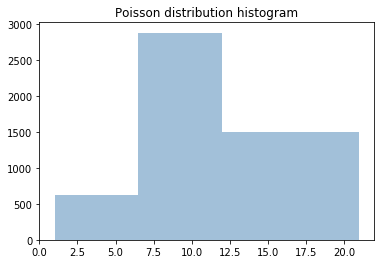

In [4]:
v = [poisson_min, poisson_min + (poisson_max+poisson_min)/4, poisson_min + 2*(poisson_max+poisson_min)/4, poisson_max];
ph = np.histogram(poisson,v);
print('Poisson histogram:');
print(ph);

plt.hist(poisson, bins=v, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title('Poisson distribution histogram');

The sum over bin counts equals to the sum over the ranges between the numbers of the vector. So, in our case this sum is 3, as it can be seen from the histogram too. Since, the "min value" is the actual minimum value of the sample (the same applies with the max), hence it should be the first (last) entry of the binning-vector.

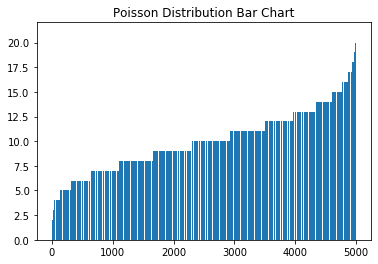

In [5]:
plt.bar(np.arange(len(poisson)), sorted(poisson));
plt.title('Poisson Distribution Bar Chart');

* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random

1 25
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 25]), array([  4,  12,  36, 102, 198, 343, 446, 574, 678, 631, 542, 469, 343,
       237, 155, 114,  59,  30,  12,  10,   2,   1,   2], dtype=int64))


Text(0.5, 0, 'Degree')

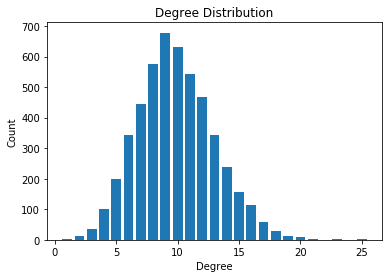

In [7]:
N = 5000
k = 10
p = k / (N - 1)
G = nx.erdos_renyi_graph(N, p)
nx.adjacency_matrix(G)
degrees = dict(G.degree())
values = np.array(list(degrees.values()))
first_edge, last_edge = values.min(), values.max()
print(first_edge, last_edge)
n_equal_bins = 5000
bin_edges = np.linspace(start=first_edge, stop=last_edge, num=n_equal_bins + 1, endpoint=True)
hist, bins = np.histogram(values, bins = bin_edges)
print(np.unique(values, return_counts=True))
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(hist))]
plt.bar(bins_mean, hist)
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

Random node:  199
Nodes at distance two: [0, 198]


C:\Users\fpegios\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


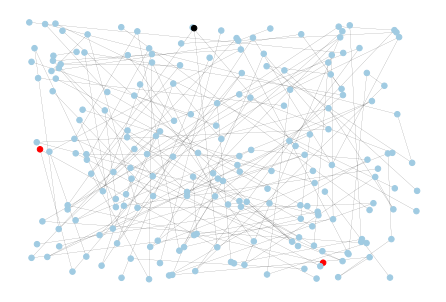

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
# import random as rand
from random import choice
import numpy as np

nodes = []
notconnected = []
connected = []

for i in range(0, 200):
    nodes.append(i)

# Creating graph
G = nx.Graph()

# Assigning the nodes to the graph
for i in range(0, len(nodes)):
    G.add_node(nodes[i])
    
# Adding edges in order to achieve average degree equals to 1.5
firstHalf = 99
secondHalf = 199
for i in range(0, 100):
    G.add_edge(i, firstHalf)
    firstHalf -= 1
    
for i in range(100, 200):
    G.add_edge(i, secondHalf)
    G.add_edge(i, secondHalf-1)
    secondHalf -= 1

# Extracting the Giant Connected Component
Gc = max(nx.connected_component_subgraphs(G), key=len)

# Getting a random node from the GCC
randomNode = choice(list(Gc.nodes))

# Printing out the random node
print ("Random node: ", randomNode)

colorMap = []

# Instantiating an empty list where we're going to put the nodes at distance 2
nodesAtDistanceTwo = []

# Loop to get the nodes at distance 2
closeNodes = nx.single_source_shortest_path_length(G, randomNode)
    
for i in range(0, len(nodes)):
    if i in closeNodes:
        if i == randomNode:
            colorMap.append("#000000")
        elif closeNodes.get(i) == 2:
            # We append it to the list
            nodesAtDistanceTwo.append(i)
            colorMap.append("#ff0000") 
        else:
            colorMap.append("#A0CBE2")
    else:
        colorMap.append("#A0CBE2")

        
print ("Nodes at distance two:", nodesAtDistanceTwo)

# Drawing the Graph
nx.draw_random(G, node_size=30, node_color=colorMap, width=0.1)
plt.show()

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.

Text(0.5, 1.0, 'Watts-Strogatz graph with p=0.0')

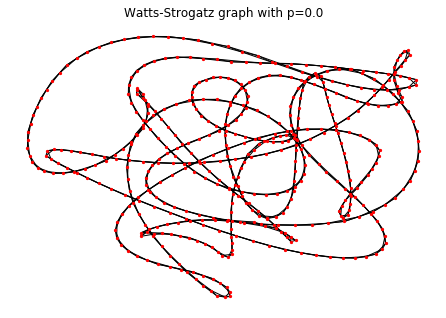

In [9]:
G1 = nx.watts_strogatz_graph(500, 4, 0.0)
nx.draw(G1, node_size=5, node_color='r',)
plt.title('Watts-Strogatz graph with p=0.0')

Text(0.5, 1.0, 'Circular plot with p=0.0')

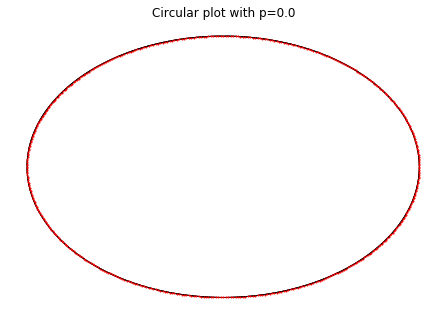

In [10]:
nx.draw_circular(G1, node_size=1, node_color='r',)
plt.title('Circular plot with p=0.0')

Text(0.5, 1.0, 'Watts-Strogatz graph with p=0.1')

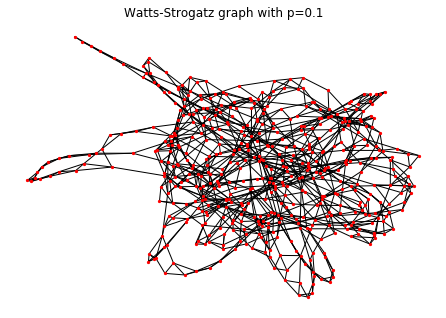

In [11]:
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
nx.draw(G2, node_size=5, node_color='r',)
plt.title('Watts-Strogatz graph with p=0.1')

Text(0.5, 1.0, 'Circular plot with p=0.1')

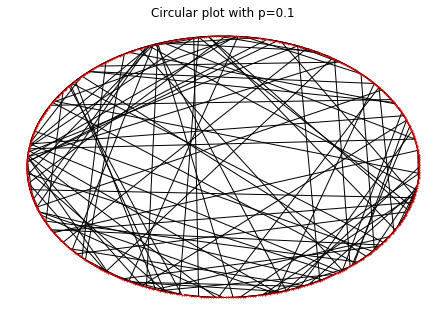

In [12]:
nx.draw_circular(G2, node_size=1, node_color='r',)
plt.title('Circular plot with p=0.1')

Text(0.5, 1.0, 'Watts-Strogatz graph with p=1.0')

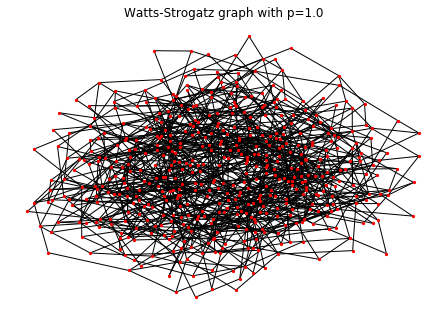

In [13]:
G3 = nx.watts_strogatz_graph(500, 4, 1.0)
nx.draw(G3, node_size=5, node_color='r',)
plt.title('Watts-Strogatz graph with p=1.0')

Text(0.5, 1.0, 'Circular plot with p=1.0')

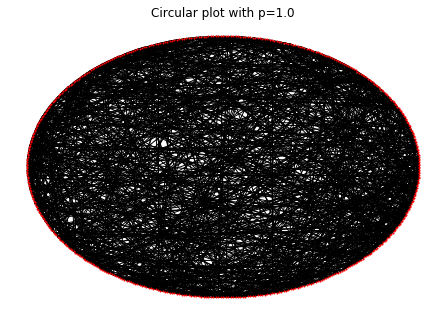

In [14]:
nx.draw_circular(G3, node_size=1, node_color='r',)
plt.title('Circular plot with p=1.0')

Initially, with $p=0$, each node of the network is connected only to their immediate closest neighbours. As we increase $p$, each link is 'redirected' into a random node of the network. Consequently, if we increase the value of $p$ to $1$, each link will be redirected, ultimately turning the network into a random network.

* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

In [15]:
n = 50
N = 500
k = 4
ps = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
means_approx = []
means = []

std_approx = []
std = [] 

for p in ps:
    print('p = {}:'.format(p))
    distances = []
    for i in range(n):
        G = nx.watts_strogatz_graph(N, k, p)
        distances = np.append(distances, nx.average_shortest_path_length(G))
    mean = np.mean(distances)
    s = np.std(distances)
    means = np.append(means, mean)
    std = np.append(std, s)
    print('Mean: {}'.format(mean))
    print('Std: {}\n'.format(s))

p = 0:
Mean: 62.87575150300602
Std: 7.105427357601002e-15

p = 0.01:
Mean: 23.56865971943888
Std: 4.868342282458371

p = 0.03:
Mean: 13.163822685370741
Std: 1.2807415466701266

p = 0.05:
Mean: 10.286004328657317
Std: 0.7987525702881658

p = 0.1:
Mean: 7.718984529058116
Std: 0.2927749448817213

p = 0.2:
Mean: 6.124739879759519
Std: 0.11276081847701219



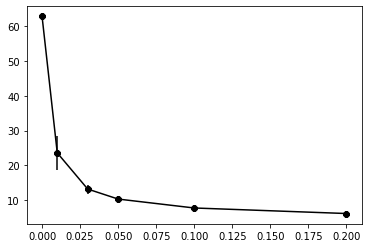

In [16]:
plt.errorbar(np.array(ps), np.array(means), np.array(std), c='black', marker='8')
plt.show()

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

In [17]:
# Define some methods

class Barbasi_Albert_Model:
    
    def __init__(self):
        # Init graph with two nodes
        self.nodes = np.array([0, 1])
        self.edges = np.array([(0,1)])
        self.degrees = np.array([1, 1])
        

    def get_probabilities(self):
        s = np.sum(self.degrees)
        probabilities = [d/s for d in self.degrees]
        return probabilities

    def add_node(self):
        node = len(self.nodes)
        connects_to = np.array([np.random.choice([-1, i], p=[1-pr, pr]) for i, pr in enumerate(self.get_probabilities())])
        connects_to = connects_to[connects_to != -1]
        if len(connects_to) == 0:
            return False
        self.nodes = np.append(self.nodes, node)
        for c in connects_to:
            self.edges = np.vstack([self.edges, np.array([(c, node)])])
            self.degrees[c] += 1
        self.degrees = np.append(self.degrees, len(connects_to))
        return True
    
    def add_node_by_m(self, m):
        node = len(self.nodes)
        connects_to = np.random.choice(self.nodes, m, p=self.get_probabilities())
        connects_to = connects_to[connects_to != -1]
        if len(connects_to) == 0:
            return False
        self.nodes = np.append(self.nodes, node)
        for c in connects_to:
            self.edges = np.vstack([self.edges, np.array([(c, node)])])
            self.degrees[c] += 1
        self.degrees = np.append(self.degrees, len(connects_to))
        return True

In [18]:
# Create a BA model with 100 nodes

N = 100
BA = Barbasi_Albert_Model()

i = 0
while i < (N - 2):
    if BA.add_node_by_m(1):
    # if BA.add_node():    
        i += 1

print(BA.nodes)
print(BA.degrees)
print(BA.degrees.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[13 13  7  2  4  8  6  2  2  1  7  1  9  3  5  2  1  3  2  1  2  4  1  2
  1  4  1  2  1  1  4  1  1  2  2  1  2  2  1  1  2  1  1  3  1  1  1  1
  1  1  3  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  2  2  2  1
  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
(100,)


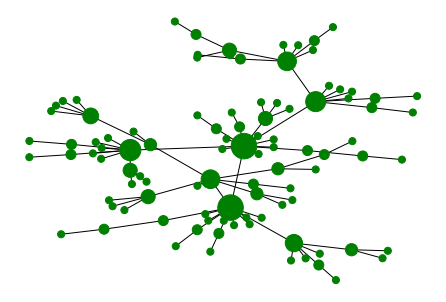

In [19]:
G = nx.Graph()
G.add_edges_from(BA.edges)
nx.draw(G, node_color='g', node_size=[50 * d for d in BA.degrees])

In [20]:
# Create a BA model with 5000 nodes

N = 5000
BA = Barbasi_Albert_Model()

i = 0
while i < (N - 2):
    if BA.add_node_by_m(1):
    # if BA.add_node():
        i += 1

first_edge, last_edge = np.min(BA.degrees), np.max(BA.degrees)
print(first_edge, last_edge)

1 145


Text(0.5, 0, 'Degree')

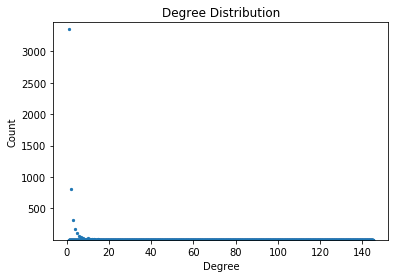

In [21]:
n_equal_bins = N
bin_edges = np.linspace(start=first_edge, stop=last_edge, num=n_equal_bins + 1, endpoint=True)
hist, bins = np.histogram(BA.degrees, bins = bin_edges)
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(hist))]
plt.scatter(x=bins_mean, y=hist, s=5)
plt.ylim((1, 100 + np.max(hist)))
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")

Text(0.5, 0, 'Degree')

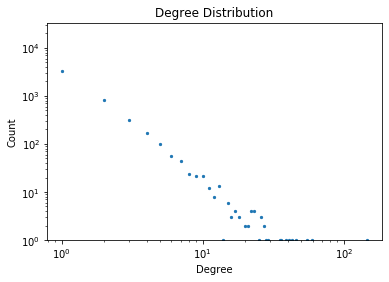

In [22]:
plt.scatter(x=bins_mean, y=hist, s=5)
plt.xscale("log")
plt.yscale("log")
plt.ylim((1, 10 * np.max(hist)))
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

In [23]:
BA = nx.barabasi_albert_graph(5000, 10);

# Pick random node
randomNode = choice(list(BA.nodes))
print('Random node: ', randomNode)

# Find random node degree
randomNodeDegree = BA.degree(randomNode)
print('Random node degree: ', randomNodeDegree)

# Find random node's neighbors
randomNodeNeighbors = [n for n in BA.neighbors(randomNode)];
print('Random node neighbors: ', randomNodeNeighbors)

# Find random node's neighbors average degree
randomNodeNeighbors_avgDegree_dict = nx.average_neighbor_degree(BA, nodes=randomNodeNeighbors);
# print(randomNodeNeighbors_avgDegree_dict)
sumDegrees = 0
for key in randomNodeNeighbors_avgDegree_dict:
    sumDegrees = sumDegrees + randomNodeNeighbors_avgDegree_dict.get(key);
randomNodeNeighbors_avgDegree = sumDegrees / len(randomNodeNeighbors_avgDegree_dict)
print('Random node neighbors average degree: ', randomNodeNeighbors_avgDegree)

# Counter which will count the times the paradox is true
paradoxTrueCounter = 0;
for i in range(0, 1000):
    randomNode = choice(list(BA.nodes))
    randomNodeDegree = BA.degree(randomNode)
    # Find random node's neighbors
    randomNodeNeighbors = [n for n in BA.neighbors(randomNode)];
    # Find random node's neighbors average degree
    randomNodeNeighbors_avgDegree_dict = nx.average_neighbor_degree(BA, nodes=randomNodeNeighbors);
    sumDegrees = 0
    for key in randomNodeNeighbors_avgDegree_dict:
        sumDegrees = sumDegrees + randomNodeNeighbors_avgDegree_dict.get(key);
    randomNodeNeighbors_avgDegree = sumDegrees / len(randomNodeNeighbors_avgDegree_dict)
    if (randomNodeDegree < randomNodeNeighbors_avgDegree):
        paradoxTrueCounter += 1;
        
ratio = (paradoxTrueCounter / 1000 ) * 100;

print('In 1000 repeats, friendship paradox is true with this percentage: ', ratio, '%')


Random node:  1166
Random node degree:  15
Random node neighbors:  [827, 996, 232, 75, 315, 82, 178, 306, 406, 27, 2612, 2657, 2872, 3801, 4384]
Random node neighbors average degree:  50.00665176784843
In 1000 repeats, friendship paradox is true with this percentage:  92.60000000000001 %
